In [1]:
from CANN_DDM_models import get_DDM_simulation, get_RT, run_CANN_simulation, run_CANN_simulation_two_edges, CANN_DDM_bump_edge_model,  CANN_DDM_bump_edge_model_v2
from RT_analysis import plot_RT_distribution, simulate_network
import numpy as np
from matplotlib import pyplot as plt
from brainpy import math as bm
import brainpy as bp
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
### DDM parameters
dt = 1. # unit: ms
dt_DDM = 10. # unit: ms; make sure the timescale of DDM is no smaller than the timecale of network sim
# parameters for DDM model
v1 = 1000 # all-way right
v2 = -1000 # all-way left
sig_W = .5
boundary = 0.9
seed = 2025
### Laplace network model parameters

dur1 = 500 # unit: ms
dur2 = 1500
#dur2 = 0
num=1024
tau_bump = .1
tau_edge = 1.
beta = 2
c1 = 1 #coff from bump to edge
c2 = 1 #coff from edge to bump
alpha = 3
speed_mode = 'log'
offset = 3.85
delta_z = 1/40
J0_bump = 4
J0_edge = 1
a = 0.25
A = 10
edge_type = 'tanh'
t_prep = (dur1 + 0.1 * dur2)
mon_vars=['u','v', 's' , 'Ishift', 'u_pos', 'u_dpos', 's_pos', 'Ius', 'I_pause', 'c1_dyn', 'RT']

clicks_left, clicks_right, l, p = get_DDM_simulation(v1, sig_W, dur1, dur2, dt_DDM, dt=dt, seed=seed)
my_model = CANN_DDM_bump_edge_model(num=num, c1=c1, c2=c2, J0_bump=J0_bump,
                                 tau_bump = tau_bump,
                                 J0_edge=J0_edge, edge_offset=offset,
                                 optimize_offset=False,
                                 t_prep = t_prep, a=a, A=A,
                                beta=beta, edge_type=edge_type, delta_z=delta_z, seed=seed, boundary=boundary, speed_mode=speed_mode, alpha=alpha)
runner_right = run_CANN_simulation(my_model, clicks_left, clicks_right, dur1, dur2, mon_vars, dt=dt)
my_model = CANN_DDM_bump_edge_model(num=num, c1=c1, c2=c2, J0_bump=J0_bump,
                                 tau_bump = tau_bump,
                                 J0_edge=J0_edge, edge_offset=offset,
                                 optimize_offset=False,
                                 t_prep = t_prep, a=a, A=A,
                                beta=beta, edge_type=edge_type, delta_z=delta_z, seed=seed, boundary=boundary, speed_mode=speed_mode, alpha=alpha)

clicks_left, clicks_right, l, p = get_DDM_simulation(v2, sig_W, dur1, dur2, dt_DDM, dt=dt, seed=seed)
runner_left = run_CANN_simulation(my_model, clicks_left, clicks_right, dur1, dur2, mon_vars, dt=dt)




  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

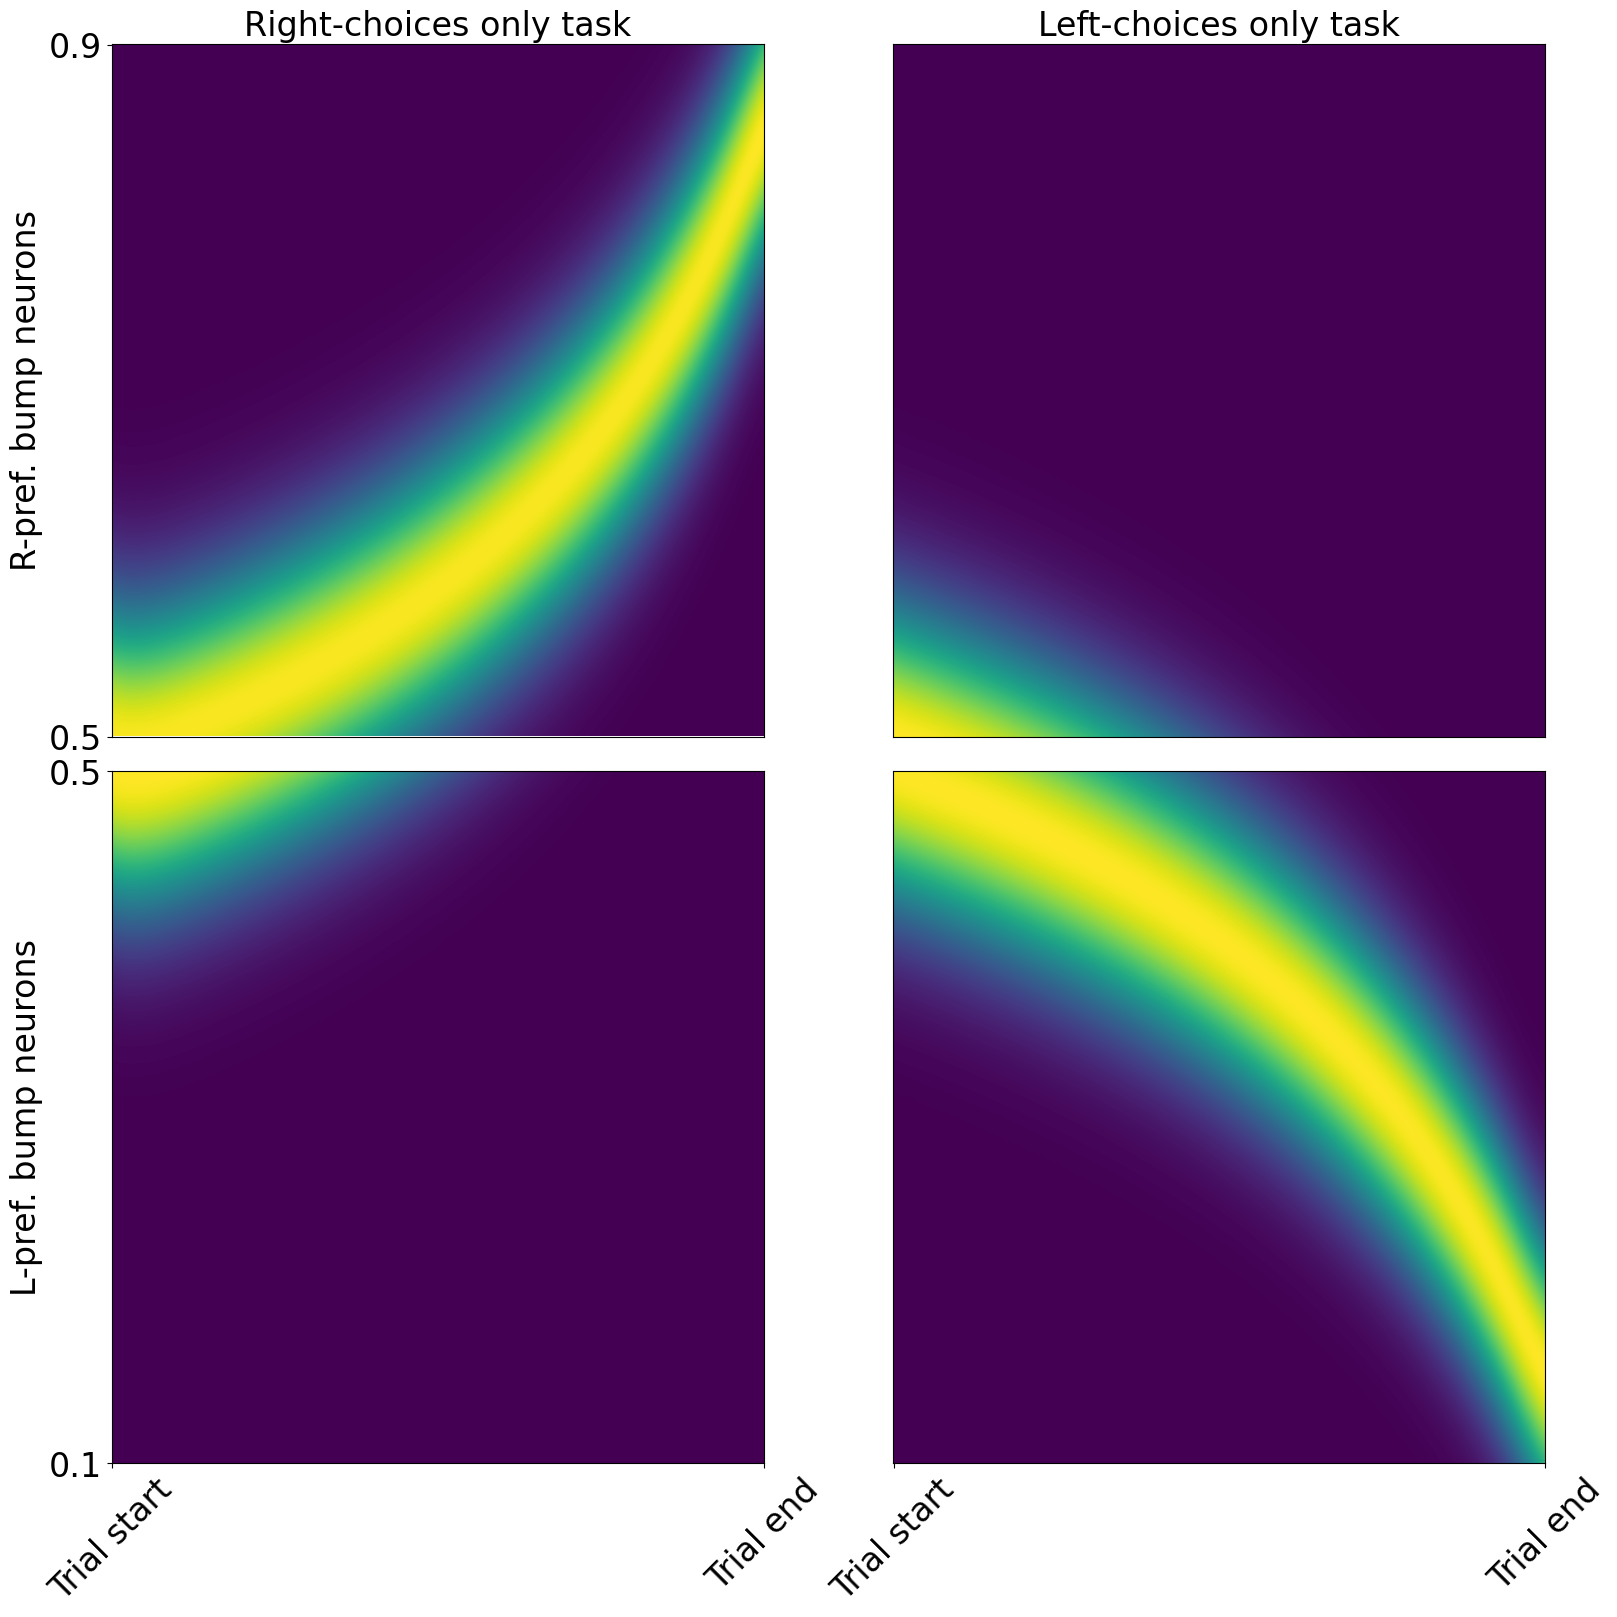

In [6]:
offset = 0
r_pref_start = int(num * (0.5+offset))
r_pref_end = int(num * (boundary-offset))
l_pref_start = int(num * (1-(boundary-offset)))
l_pref_end = int(num * (0.5-offset))
num_right_pref = r_pref_end - r_pref_start
num_left_pref = l_pref_end - l_pref_start
RT_right = runner_right.mon.RT[-1]
RT_left = runner_left.mon.RT[-1]
bump_r_pref_r_task = runner_right.mon.u.T[r_pref_start:r_pref_end,int(t_prep):int(t_prep+RT_right)][::-1,:]
bump_l_pref_r_task = runner_right.mon.u.T[l_pref_start:l_pref_end,int(t_prep):int(t_prep+RT_right)][::-1,:]
bump_r_pref_l_task = runner_left.mon.u.T[r_pref_start:r_pref_end,int(t_prep):int(t_prep+RT_left)][::-1,:]
bump_l_pref_l_task = runner_left.mon.u.T[l_pref_start:l_pref_end,int(t_prep):int(t_prep+RT_left)][::-1,:]
#edge_right_pref = runner.mon.s.T[start_idx:end_idx,int(t_prep):1700][::-1,:]

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0,0].imshow(bump_r_pref_r_task, aspect='auto')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([0, num_right_pref], [boundary, 0.5], fontsize=24)
#axs[0,0].set_xlabel('time', fontsize=18)
axs[0,0].set_ylabel('R-pref. bump neurons', fontsize=24) 
axs[0,0].set_title("Right-choices only task", fontsize=24)


axs[1,0].imshow(bump_l_pref_r_task, aspect='auto')
axs[1,0].set_yticks([0, num_left_pref], [0.5, round(1-boundary,1), ], fontsize=24)
axs[1,0].set_xticks([0, RT_right], ['Trial start', 'Trial end'], fontsize=24, rotation=45)
axs[1,0].set_ylabel('L-pref. bump neurons', fontsize=24)


axs[0,1].imshow(bump_r_pref_l_task, aspect='auto')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_xlabel('time', fontsize=18)
axs[0,1].set_title("Left-choices only task", fontsize=24)


axs[1,1].imshow(bump_l_pref_l_task, aspect='auto')
axs[1,1].set_xticks([0, RT_left], ['Trial start', 'Trial end'], fontsize=24, rotation=45)
axs[1,1].set_yticks([])
#axs[1,1].set_xlabel('Time [ms]', fontsize=24)

fig.tight_layout(pad=0.1)

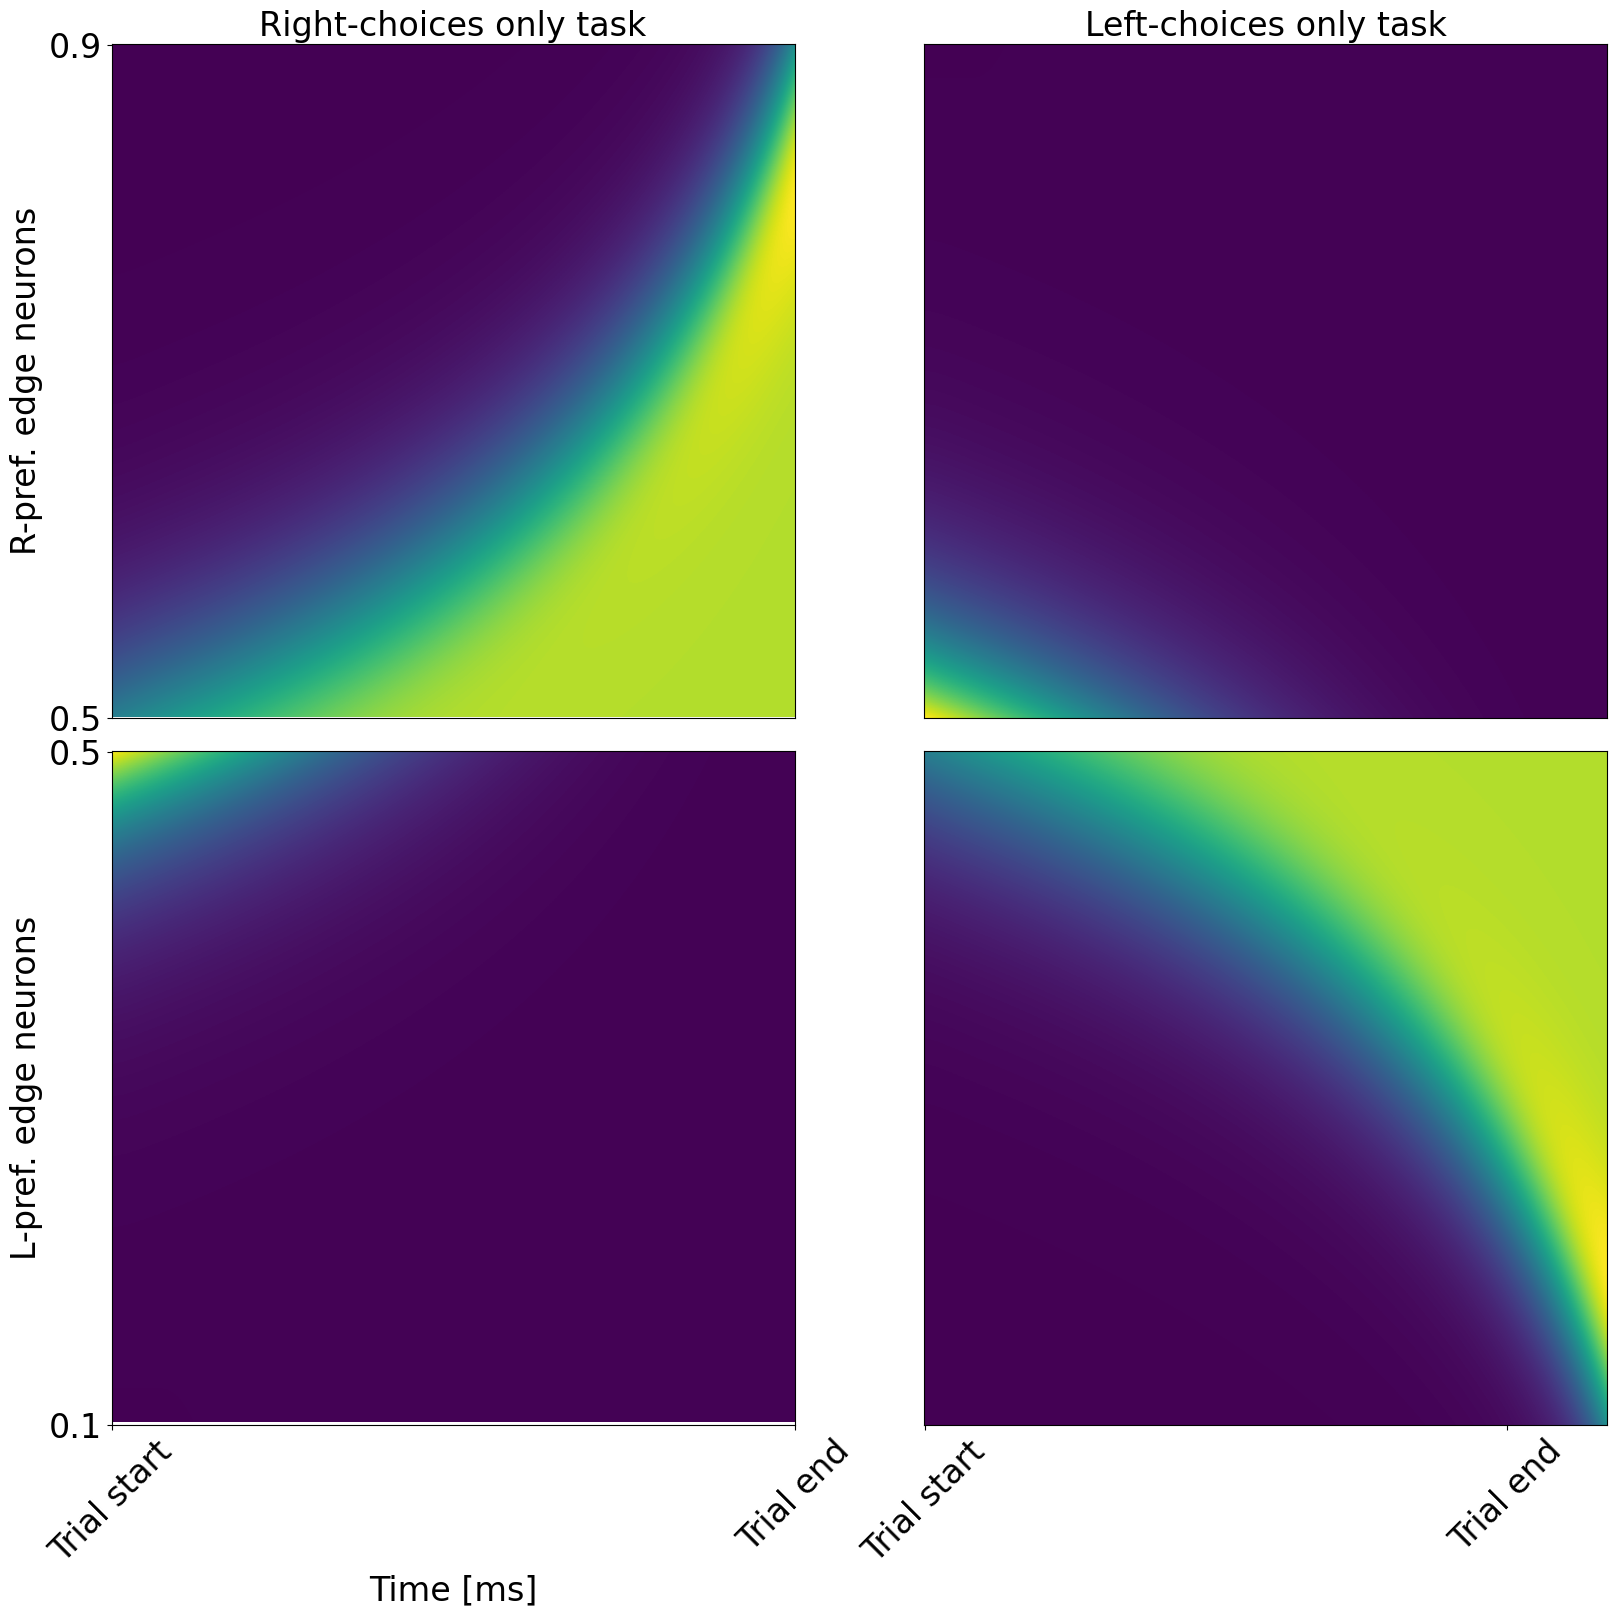

In [7]:
offset = 0
r_pref_start = int(num * (0.5+offset))
r_pref_end = int(num * (boundary-offset))
l_pref_start = int(num * (1-(boundary-offset)))
l_pref_end = int(num * (0.5-offset))
num_right_pref = r_pref_end - r_pref_start
num_left_pref = l_pref_end - l_pref_start
RT_right = runner_right.mon.RT[-1]
RT_left = runner_left.mon.RT[-1]
edge_r_pref_r_task = runner_right.mon.s.T[r_pref_start:r_pref_end,int(t_prep):int(t_prep+RT_right)][::-1, :]
edge_l_pref_r_task = runner_left.mon.s.T[r_pref_start:r_pref_end,int(t_prep):int(t_prep+RT_left)]
edge_r_pref_l_task = runner_left.mon.s.T[r_pref_start:r_pref_end,int(t_prep):int(t_prep+RT_left)][::-1, :]
edge_l_pref_l_task = runner_right.mon.s.T[r_pref_start:r_pref_end,int(t_prep):int(t_prep+RT_right)]

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0,0].imshow(edge_r_pref_r_task, aspect='auto')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([0, num_right_pref], [boundary, 0.5], fontsize=24)
#axs[0,0].set_xlabel('time', fontsize=18)
axs[0,0].set_ylabel('R-pref. edge neurons', fontsize=24) 
axs[0,0].set_title("Right-choices only task", fontsize=24)


axs[1,0].imshow(edge_l_pref_r_task, aspect='auto')
axs[1,0].set_xticks([0, RT_left], ['Trial start', 'Trial end'], fontsize=24, rotation=45)
axs[1,0].set_yticks([0, num_left_pref], [0.5, round(1-boundary,1)], fontsize=24)
axs[1,0].set_xlabel('Time [ms]', fontsize=24)
axs[1,0].set_ylabel('L-pref. edge neurons', fontsize=24)


axs[0,1].imshow(edge_r_pref_l_task, aspect='auto')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_xlabel('time', fontsize=18)
axs[0,1].set_title("Left-choices only task", fontsize=24)


axs[1,1].imshow(edge_l_pref_l_task, aspect='auto')
axs[1,1].set_xticks([0, RT_left], ['Trial start', 'Trial end'], fontsize=24, rotation=45)
axs[1,1].set_yticks([])
#axs[1,1].set_xlabel('Time', fontsize=24, labelpad=10)

fig.tight_layout(pad=0.1)

In [12]:
### DDM parameters
dt = 1. # unit: ms
dt_DDM = 10. # unit: ms; make sure the timescale of DDM is no smaller than the timecale of network sim
# parameters for DDM model
v = 1000 # all-way right
v2 = -1000 # all-way left
sig_W = .5
boundary = 0.9
seed = 2025
### Laplace network model parameters
dur1 = 500 # unit: ms
dur2 = 1500
#dur2 = 0
num=2048
tau_bump = .1
tau_edge = 1.
beta = 2
c1 = 1 #coff from bump to edge
c2 = 1 #coff from edge to bump
alpha = 1.5
speed_mode = 'log'
offset = 3.85
delta_z = 1/40
J0_bump = 4
J0_edge = 1
a = 0.25
A = 10
edge_type = 'tanh'
t_prep = (dur1 + 0.1 * dur2)

mon_vars=['u','u_l', 'v', 's' , 's_l', 'Ishift', 'u_pos', 'u_dpos', 's_pos', 'Ius', 'I_pause', 'c1_dyn', 'RT', 'Iulul', 'input1', 'input2']
clicks_left, clicks_right, l, p = get_DDM_simulation(v, sig_W, dur1, dur2, dt_DDM, dt=dt, seed=seed)
my_model = CANN_DDM_bump_edge_model_v2(num=num, c1=c1, c2=c2, J0_bump=J0_bump,
                                 tau_bump = tau_bump,
                                 J0_edge=J0_edge, edge_offset=offset,
                                 optimize_offset=False,
                                 t_prep = t_prep, a=a, A=A,
                                beta=beta, edge_type=edge_type, delta_z=delta_z, seed=seed, boundary=boundary, speed_mode=speed_mode, alpha=alpha)
runner = run_CANN_simulation_two_edges(my_model, clicks_left, clicks_right, dur1, dur2, mon_vars, dt=dt)




d:\research\CANN_DDM\CANN_DDM_models.py:352: RuntimeWarning: overflow encountered in exp
  n,t,delta_z=delta_z,n0=n0,t0=t0)*delta_z/np.exp(delta_z*(n-n0))


  0%|          | 0/2000 [00:00<?, ?it/s]

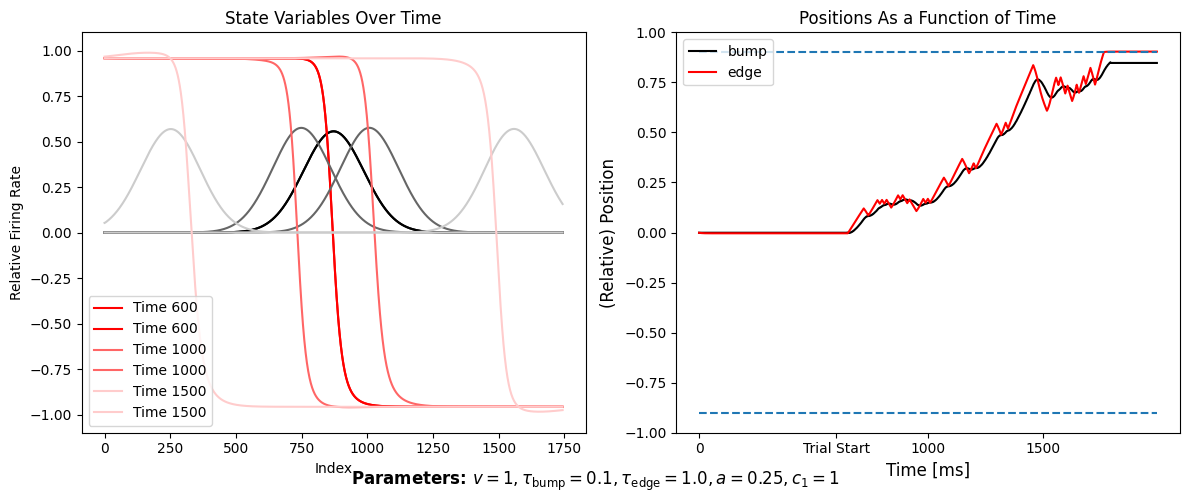

The real delta_u is 0.0020037880167365074


In [11]:
### plot the dynamics
mask = my_model.mask

reds = [(1, 1-x, 1-x) for x in np.linspace(1, 0.2, 3)]
blues = [(1-x, 1-x, 1) for x in np.linspace(1, 0.2, 3)]
blacks = [(1-x, 1-x, 1-x) for x in np.linspace(1, 0.2, 3)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  


for idx, t in enumerate(np.array([600, 1000, 1500])-1):
    axes[0].plot(runner.mon.u[int(t), mask], color=blacks[idx])
    axes[0].plot(runner.mon.u_l[int(t), mask], color=blacks[idx])
    axes[0].plot(np.tanh(my_model.beta * runner.mon.s[int(t), mask]), color=reds[idx], label=f'Time {t+1}')
    axes[0].plot(np.tanh(my_model.beta * runner.mon.s_l[int(t), mask]), color=reds[idx], label=f'Time {t+1}')
    
axes[0].set_ylim([-1.1, 1.1])

axes[0].legend()
axes[0].set_title("State Variables Over Time")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Relative Firing Rate")


axes[1].plot(runner.mon.u_pos, color=blacks[0], label='bump')
axes[1].plot(runner.mon.s_pos, color=reds[0], label='edge')
axes[1].legend()
axes[1].set_xticks([0, 600, 1000, 1500])
axes[1].set_xticklabels([0, 'Trial Start', 1000, 1500])
axes[1].set_xlabel("Time [ms]", fontsize=12)
axes[1].set_ylabel("(Relative) Position", fontsize=12)
axes[1].set_ylim([-1,1])
axes[1].set_title("Positions As a Function of Time")
axes[1].hlines(boundary, xmin=0, xmax=dur1+dur2, linestyle='--')
axes[1].hlines(-boundary, xmin=0, xmax=dur1+dur2, linestyle='--')


plt.tight_layout()  
param_text = fr"Parameters: $v={v}, \tau_{{\text{{bump}}}}={tau_bump}, \tau_{{\text{{edge}}}}={tau_edge}, a={a}, c_1={c1}$"
plt.figtext(0.5, 0.02, param_text, ha="center", fontsize=12, fontweight="bold")
plt.show()
du = np.mean(np.abs(np.diff(runner.mon.s_pos[int(t_prep)+200:int(t_prep)+400].T))) 
print(fr'The real delta_u is {du}')

Saving the animation into test_two_edge_bump.gif ...
MovieWriter imagemagick unavailable; using Pillow instead.


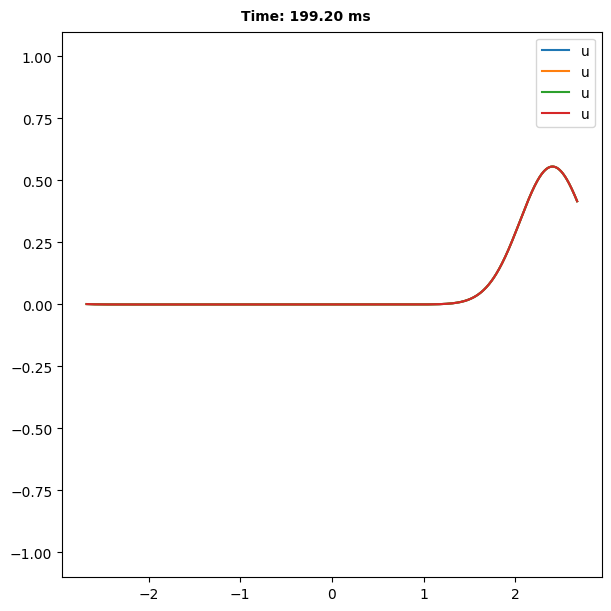

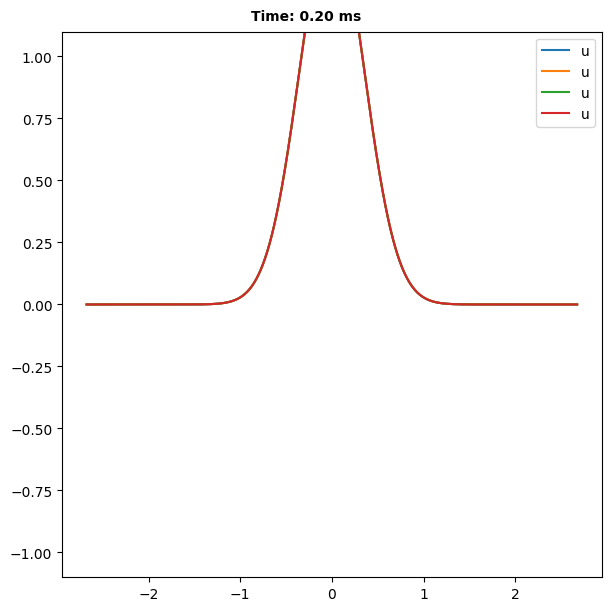

In [ ]:
display_vars = ['u',  's', 'u_l', 's_l']
mask = my_model.mask
#dynamical_vars = [{'ys': getattr(runner.mon, var)[:, mask], 'xs': my_model.x[mask], 'label': var} for var in display_vars]
dynamical_vars=[{'ys': runner.mon.u[:, mask], 'xs': my_model.x[mask], 'legend': 'u'},
                        {'ys': my_model.get_s_fr(runner.mon.s[:, mask]), 'xs': my_model.x[mask], 'legend': 'u'},
                        {'ys': runner.mon.u_l[:, mask], 'xs': my_model.x[mask], 'legend': 'u'},
                        {'ys': my_model.get_s_fr(runner.mon.u[:, mask]), 'xs': my_model.x[mask], 'legend': 'u'}]
bp.visualize.animate_1D(
        dynamical_vars=dynamical_vars,
        frame_step=10,
        frame_delay=50,
        show=True,
        save_path='test_two_edge_bump.gif',
        ylim=[-1.1,1.1]
    )

## Illustration figure 

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ddm(drift=0.1, noise=1.0, dt=0.01, T=1.0, bounds=(-1, 1)):
    """Simulate a single DDM trajectory."""
    n_steps = int(T/dt)
    trajectory = np.zeros(n_steps)
    
    for i in range(1, n_steps):
        # Add drift and noise
        dx = drift * dt + noise * np.sqrt(dt) * np.random.normal()
        trajectory[i] = trajectory[i-1] + dx
        
        # Check bounds
        if trajectory[i] >= bounds[1] or trajectory[i] <= bounds[0]:
            trajectory[i:] = trajectory[i]
            break
    
    return trajectory

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
n_trials = 5
T = 1.0  # Total time in seconds
dt = 0.001  # Time step
t = np.arange(0, T, dt)  # Time array

# Create figure with white background
plt.figure(figsize=(6, 3), facecolor='white')

# Simulate and plot multiple trajectories
for _ in range(n_trials):
    # Randomly vary drift rate to get different trajectories
    drift = 0.1 + np.random.normal(0, 0.2)
    trajectory = simulate_ddm(drift=drift, noise=2.0, dt=dt, T=T)
    plt.plot(t, trajectory, 'k-', linewidth=2, alpha=1)

# Add horizontal dotted lines for bounds
plt.axhline(y=1, color='k', linestyle=':', alpha=0.5)
plt.axhline(y=-1, color='k', linestyle=':', alpha=0.5)

# Add vertical line at t=0
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Hide axis and labels
plt.axis('off')
plt.xlim(-0.2, 1.0)
plt.ylim(-1, 1)
#plt.text(-0.15, 1, 'B', fontsize=16)  # Label for upper boundary
#plt.text(-0.15, -1.07, '0', fontsize=16)  # Label for lower boundary
#plt.title("DDM", fontsize = 20)

# Save the figure with white background
plt.savefig('ddm_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()